In [158]:
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt     
get_ipython().magic('matplotlib inline')
import seaborn as sns               
from IPython.display import display
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, train_test_split
from collections import defaultdict
from scipy.stats import hmean
from scipy.spatial.distance import cdist
from scipy import stats
import numbers

In [166]:
engine = create_engine('sqlite:///MyDB.db', echo=False)
data=pd.read_sql_query("select * from Dataset;", engine)
data = data.drop('index',axis=1)

data = data.drop('p9',axis=1)
data = data.drop('p3',axis=1)

Information data DataSet:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 13 columns):
Id        15120 non-null int64
p1        12156 non-null float64
p2        12188 non-null float64
p4        12071 non-null float64
p5        12083 non-null float64
p6        12057 non-null float64
p7        12151 non-null float64
p8        12035 non-null float64
p10       12152 non-null float64
p11       12031 non-null float64
p12       12031 non-null float64
p13       12198 non-null float64
target    15120 non-null int64
dtypes: float64(11), int64(2)
memory usage: 1.5 MB
None
Statistics Information  DataSet:
                Id            p1            p2      ...                p12           p13        target
count  15120.00000  12156.000000  12188.000000      ...       12031.000000  12198.000000  15120.000000
mean    7560.50000   2746.864676    155.722432      ...           0.032250      0.418675      4.000000
std     4364.91237    417.908441    109.82

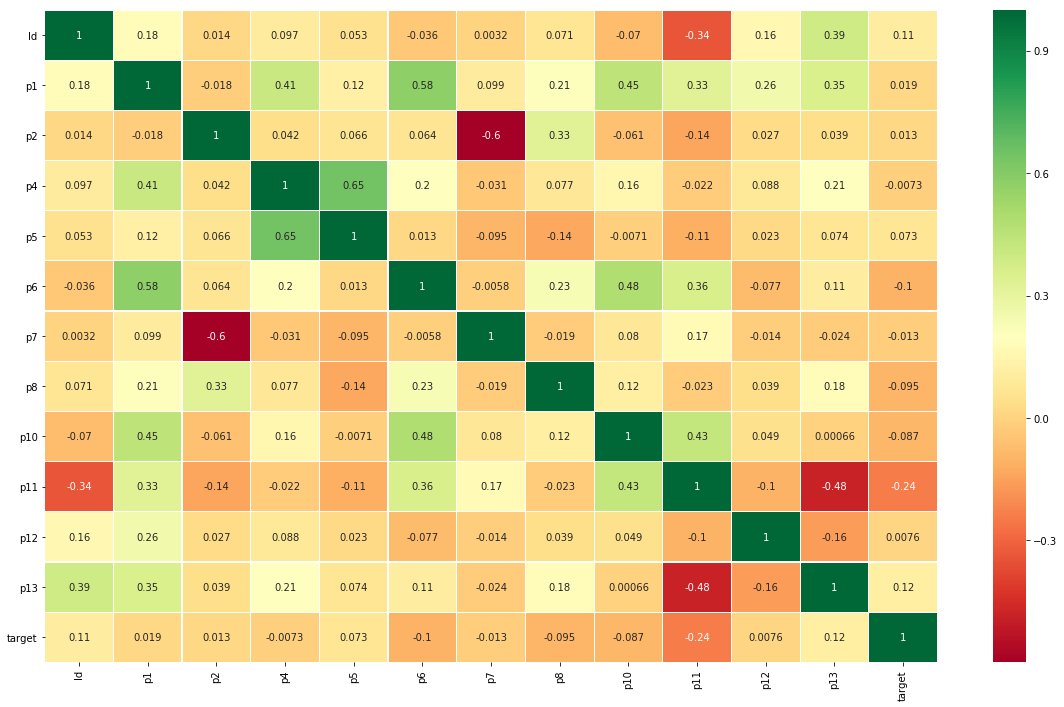

In [167]:
print("======================================================================================")
print("Information data DataSet:")
print("======================================================================================")
print(data.info())
print("======================================================================================")
print("Statistics Information  DataSet:")
print("======================================================================================")
print(data.describe())
print("Correlations:")
print(data.corr())
print("======================================================================================")
#****************************************

#***************visualize correlation DataSet*************************
corrMat = data.corr()
sns.heatmap(corrMat,annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

In [ ]:
g = sns.pairplot(data=data, hue='Survived', palette = 'seismic',
                 size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

In [169]:
import numpy as np
from sklearn.cluster import KMeans

def kmeans_missing(X, n_clusters, max_iter=10):
    
    missing = ~np.isfinite(X)
    mu = np.nanmean(X, 0, keepdims=1)
    X_hat = np.where(missing, mu, X)

    for i in range(max_iter):
        if i > 0:
            cls = KMeans(n_clusters, init=prev_centroids)
        else:
            cls = KMeans(n_clusters, n_jobs=-1)

        labels = cls.fit_predict(X_hat)
        centroids = cls.cluster_centers_

        X_hat[missing] = centroids[labels][missing]

        if i > 0 and np.all(labels == prev_labels):
            break

        prev_labels = labels
        prev_centroids = cls.cluster_centers_

    return labels, centroids, X_hat
labels, centroids, X_hat = kmeans_missing(data, n_clusters=1)

data=pd.DataFrame(X_hat)
data.head()
data.columns

RangeIndex(start=0, stop=13, step=1)

In [170]:
# data

In [171]:
all_features = data.drop([0,12],axis=1)
Targeted_feature = data[12]
X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((10584, 11), (4536, 11), (10584,), (4536,))

--------------The Accuracy of the model----------------------------
The accuracy of the Random Forest Classifier is 71.12
The cross validated score for Random Forest Classifier is: 65.37


Text(0.5,1.05,'Confusion_matrix')

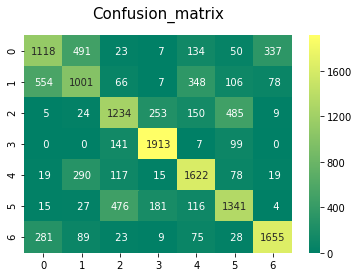

In [172]:
# Random Forests

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
model.fit(X_train,y_train)
prediction_rm=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Random Forest Classifier is',round(accuracy_score(prediction_rm,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_rm_km=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Random Forest Classifier is:',round(result_rm_km.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

--------------The Accuracy of the model----------------------------
The accuracy of the K Nearst Neighbors Classifier is 59.9
The cross validated score for K Nearest Neighbors Classifier is: 53.72


Text(0.5,1.05,'Confusion_matrix')

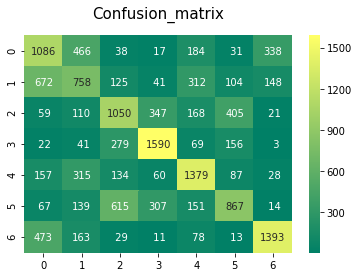

In [173]:
# KNN

from sklearn.neighbors import KNeighborsClassifier


model = KNeighborsClassifier(n_neighbors = 4)
model.fit(X_train,y_train)
prediction_knn=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the K Nearst Neighbors Classifier is',round(accuracy_score(prediction_knn,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_knn_km=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for K Nearest Neighbors Classifier is:',round(result_knn_km.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

--------------The Accuracy of the model----------------------------
The accuracy of the Gradient Boosting Classifier is 67.48
The cross validated score for AdaBoostClassifier is: 62.35


Text(0.5,1.05,'Confusion_matrix')

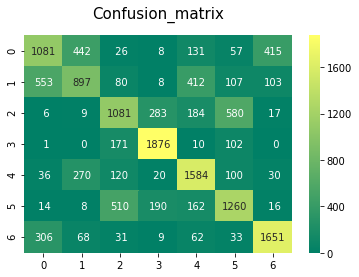

In [174]:
# GradientBoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier()
model.fit(X_train,y_train)
prediction_gbc=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Gradient Boosting Classifier is',round(accuracy_score(prediction_gbc,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_gbc_km=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoostClassifier is:',round(result_gbc_km.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [175]:
# KNN Miss-Values

In [176]:
engine = create_engine('sqlite:///MyDB.db', echo=False)
mytest_median=pd.read_sql_query("select * from Dataset;", engine)
mytest_median = mytest_median.drop('index',axis=1)

mytest_median = mytest_median.drop('p9',axis=1)
mytest_median = mytest_median.drop('p3',axis=1)

In [177]:
def weighted_hamming(data):
    
    categories_dist = []
    
    for category in data:
        X = pd.get_dummies(data[category])
        X_mean = X * X.mean()
        X_dot = X_mean.dot(X.transpose())
        X_np = np.asarray(X_dot.replace(0,1,inplace=False))
        categories_dist.append(X_np)
    categories_dist = np.array(categories_dist)
    distances = hmean(categories_dist, axis=0)
    return distances


def distance_matrix(data, numeric_distance = "euclidean", categorical_distance = "jaccard"):
    
    possible_continuous_distances = ["euclidean", "cityblock"]
    possible_binary_distances = ["euclidean", "jaccard", "hamming", "weighted-hamming"]
    number_of_variables = data.shape[1]
    number_of_observations = data.shape[0]

    is_numeric = [all(isinstance(n, numbers.Number) for n in data.iloc[:, i]) for i, x in enumerate(data)]
    is_all_numeric = sum(is_numeric) == len(is_numeric)
    is_all_categorical = sum(is_numeric) == 0
    is_mixed_type = not is_all_categorical and not is_all_numeric

    if numeric_distance not in possible_continuous_distances:
        print ("The continuous distance " + numeric_distance + " is not supported.")
        return None
    elif categorical_distance not in possible_binary_distances:
        print ("The binary distance " + categorical_distance + " is not supported.")
        return None

    if is_mixed_type:
        number_of_numeric_var = sum(is_numeric)
        number_of_categorical_var = number_of_variables - number_of_numeric_var
        data_numeric = data.iloc[:, is_numeric]
        data_numeric = (data_numeric - data_numeric.mean()) / (data_numeric.max() - data_numeric.min())
        data_categorical = data.iloc[:, [not x for x in is_numeric]]

    
    if is_mixed_type:
        data_numeric.fillna(data_numeric.mean(), inplace=True)
        for x in data_categorical:
            data_categorical[x].fillna(data_categorical[x].mode()[0], inplace=True)
    elif is_all_numeric:
        data.fillna(data.mean(), inplace=True)
    else:
        for x in data:
            data[x].fillna(data[x].mode()[0], inplace=True)

    if not is_all_numeric and not (categorical_distance == 'hamming' or categorical_distance == 'weighted-hamming'):
        if is_mixed_type:
            data_categorical = pd.get_dummies(data_categorical)
        else:
            data = pd.get_dummies(data)
    elif not is_all_numeric and categorical_distance == 'hamming':
        if is_mixed_type:
            data_categorical = pd.DataFrame([pd.factorize(data_categorical[x])[0] for x in data_categorical]).transpose()
        else:
            data = pd.DataFrame([pd.factorize(data[x])[0] for x in data]).transpose()

    if is_all_numeric:
        result_matrix = cdist(data, data, metric=numeric_distance)
    elif is_all_categorical:
        if categorical_distance == "weighted-hamming":
            result_matrix = weighted_hamming(data)
        else:
            result_matrix = cdist(data, data, metric=categorical_distance)
    else:
        result_numeric = cdist(data_numeric, data_numeric, metric=numeric_distance)
        if categorical_distance == "weighted-hamming":
            result_categorical = weighted_hamming(data_categorical)
        else:
            result_categorical = cdist(data_categorical, data_categorical, metric=categorical_distance)
        result_matrix = np.array([[1.0*(result_numeric[i, j] * number_of_numeric_var + result_categorical[i, j] *
                               number_of_categorical_var) / number_of_variables for j in range(number_of_observations)] for i in range(number_of_observations)])

    np.fill_diagonal(result_matrix, np.nan)

    return pd.DataFrame(result_matrix)


def knn_impute(target, attributes, k_neighbors, aggregation_method="mean", numeric_distance="euclidean",
               categorical_distance="jaccard", missing_neighbors_threshold = 0.5):
   

    possible_aggregation_method = ["mean", "median", "mode"]
    number_observations = len(target)
    is_target_numeric = all(isinstance(n, numbers.Number) for n in target)

    if number_observations < 3:
        print ("Not enough observations.")
        return None
    if attributes.shape[0] != number_observations:
        print("The number of observations in the attributes variable is not matching the target variable length.")
        return None
    if k_neighbors > number_observations or k_neighbors < 1:
        print ("The range of the number of neighbors is incorrect.")
        return None
    if aggregation_method not in possible_aggregation_method:
        print ("The aggregation method is incorrect.")
        return None
    if not is_target_numeric and aggregation_method != "mode":
        print ("The only method allowed for categorical target variable is the mode.")
        return None

    target = pd.DataFrame(target)
    attributes = pd.DataFrame(attributes)

    distances = distance_matrix(attributes, numeric_distance, categorical_distance)
    if distances is None:
        return None

    for i, value in enumerate(target.iloc[:, 0]):
        if pd.isnull(value):
            order = distances.iloc[i,:].values.argsort()[:k_neighbors]
            closest_to_target = target.iloc[order, :]
            missing_neighbors = [x for x  in closest_to_target.isnull().iloc[:, 0]]
            if sum(missing_neighbors) >= missing_neighbors_threshold * k_neighbors:
                continue
            elif aggregation_method == "mean":
                target.iloc[i] = np.ma.mean(np.ma.masked_array(closest_to_target,np.isnan(closest_to_target)))
            elif aggregation_method == "median":
                target.iloc[i] = np.ma.median(np.ma.masked_array(closest_to_target,np.isnan(closest_to_target)))
            else:
                target.iloc[i] = stats.mode(closest_to_target, nan_policy='omit')[0][0]

    return target

In [178]:
knn_impute(target=mytest_median['p1'], attributes=mytest_median.drop(['p1', 'Id'], 1),
           aggregation_method="median", k_neighbors=10, numeric_distance='euclidean',
           categorical_distance='hamming', missing_neighbors_threshold=0.8)


knn_impute(target=mytest_median['p2'], attributes=mytest_median.drop(['p2', 'Id'], 1),
                                    aggregation_method="median", k_neighbors=10, numeric_distance='euclidean',
                                    categorical_distance='hamming', missing_neighbors_threshold=0.8)



# knn_impute(target=mytest_median['p3'], attributes=mytest_median.drop(['p3', 'Id'], 1),
#                                     aggregation_method="median", k_neighbors=10, numeric_distance='euclidean',
#                                     categorical_distance='hamming', missing_neighbors_threshold=0.8)


knn_impute(target=mytest_median['p4'], attributes=mytest_median.drop(['p4', 'Id'], 1),
                                    aggregation_method="median", k_neighbors=10, numeric_distance='euclidean',
                                    categorical_distance='hamming', missing_neighbors_threshold=0.8)


knn_impute(target=mytest_median['p5'], attributes=mytest_median.drop(['p5', 'Id'], 1),
                                    aggregation_method="median", k_neighbors=10, numeric_distance='euclidean',
                                    categorical_distance='hamming', missing_neighbors_threshold=0.8)


knn_impute(target=mytest_median['p6'], attributes=mytest_median.drop(['p6', 'Id'], 1),
                                    aggregation_method="median", k_neighbors=10, numeric_distance='euclidean',
                                    categorical_distance='hamming', missing_neighbors_threshold=0.8)


knn_impute(target=mytest_median['p7'], attributes=mytest_median.drop(['p7', 'Id'], 1),
                                    aggregation_method="median", k_neighbors=10, numeric_distance='euclidean',
                                    categorical_distance='hamming', missing_neighbors_threshold=0.8)


knn_impute(target=mytest_median['p8'], attributes=mytest_median.drop(['p8', 'Id'], 1),
                                    aggregation_method="median", k_neighbors=10, numeric_distance='euclidean',
                                    categorical_distance='hamming', missing_neighbors_threshold=0.8)


# knn_impute(target=mytest_median['p9'], attributes=mytest_median.drop(['p9', 'Id'], 1),
#                                     aggregation_method="median", k_neighbors=10, numeric_distance='euclidean',
#                                     categorical_distance='hamming', missing_neighbors_threshold=0.8)



knn_impute(target=mytest_median['p10'], attributes=mytest_median.drop(['p10', 'Id'], 1),
                                    aggregation_method="median", k_neighbors=10, numeric_distance='euclidean',
                                    categorical_distance='hamming', missing_neighbors_threshold=0.8)


knn_impute(target=mytest_median['p11'], attributes=mytest_median.drop(['p11', 'Id'], 1),
                                    aggregation_method="median", k_neighbors=10, numeric_distance='euclidean',
                                    categorical_distance='hamming', missing_neighbors_threshold=0.8)


knn_impute(target=mytest_median['p12'], attributes=mytest_median.drop(['p12', 'Id'], 1),
                                    aggregation_method="median", k_neighbors=10, numeric_distance='euclidean',
                                    categorical_distance='hamming', missing_neighbors_threshold=0.8)


knn_impute(target=mytest_median['p13'], attributes=mytest_median.drop(['p13', 'Id'], 1),
                                    aggregation_method="median", k_neighbors=10, numeric_distance='euclidean',
                                    categorical_distance='hamming', missing_neighbors_threshold=0.8)


def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
clean_dataset(mytest_median)

,Id,p1,p2,p4,p5,p6,p7,p8,p10,p11,p12,p13,target
4,5.0,2595.0,45.0,153.0,-1.0,391.0,220.0,234.0,6172.0,1.0,0.0,0.0,5.0
20,21.0,2501.0,71.0,60.0,8.0,767.0,230.0,223.0,5547.0,1.0,0.0,0.0,5.0
30,31.0,2703.0,122.0,67.0,27.0,3191.0,254.0,201.0,6123.0,1.0,0.0,0.0,5.0
38,39.0,2749.0,98.0,124.0,53.0,3316.0,252.0,183.0,6005.0,1.0,0.0,0.0,5.0
39,40.0,2686.0,354.0,0.0,0.0,3167.0,200.0,219.0,6155.0,1.0,0.0,0.0,5.0
55,56.0,2722.0,315.0,30.0,19.0,3216.0,148.0,212.0,6132.0,1.0,0.0,0.0,1.0
78,79.0,2808.0,99.0,382.0,95.0,3107.0,233.0,230.0,6341.0,1.0,0.0,0.0,1.0
84,85.0,2537.0,42.0,210.0,17.0,1132.0,222.0,224.0,4919.0,1.0,0.0,0.0,2.0
89,90.0,2745.0,306.0,67.0,24.0,2416.0,190.0,234.0,6428.0,1.0,0.0,0.0,2.0
104,105.0,2574.0,170.0,170.0,23.0,1180.0,224.0,242.0,4910.0,1.0,0.0,0.0,2.0


In [179]:
all_features = mytest_median.drop(["Id","target"],axis=1)
Targeted_feature = mytest_median["target"]
X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((904, 11), (388, 11), (904,), (388,))

--------------The Accuracy of the model----------------------------
The accuracy of the Random Forest Classifier is 70.1
The cross validated score for Random Forest Classifier is: 67.75


Text(0.5,1.05,'Confusion_matrix')

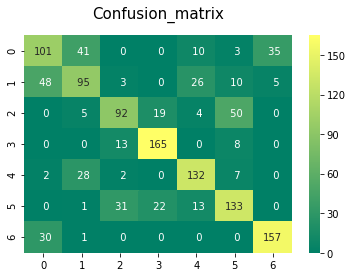

In [180]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
model.fit(X_train,y_train)
prediction_rm=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Random Forest Classifier is',round(accuracy_score(prediction_rm,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_rm_kn=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Random Forest Classifier is:',round(result_rm_kn.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

--------------The Accuracy of the model----------------------------
The accuracy of the K Nearst Neighbors Classifier is 58.25
The cross validated score for K Nearest Neighbors Classifier is: 50.26


Text(0.5,1.05,'Confusion_matrix')

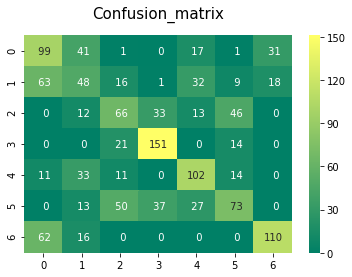

In [181]:
##knn
from sklearn.neighbors import KNeighborsClassifier


model = KNeighborsClassifier(n_neighbors = 4)
model.fit(X_train,y_train)
prediction_knn=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the K Nearst Neighbors Classifier is',round(accuracy_score(prediction_knn,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_knn_kn=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for K Nearest Neighbors Classifier is:',round(result_knn_kn.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

--------------The Accuracy of the model----------------------------
The accuracy of the Gradient Boosting Classifier is 67.78
The cross validated score for AdaBoostClassifier is: 65.29


Text(0.5,1.05,'Confusion_matrix')

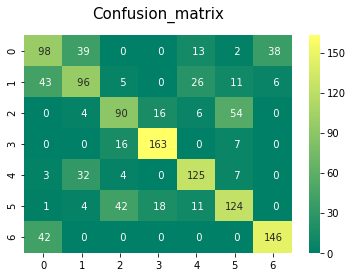

In [182]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier()
model.fit(X_train,y_train)
prediction_gbc=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Gradient Boosting Classifier is',round(accuracy_score(prediction_gbc,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_gbc_kn=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoostClassifier is:',round(result_gbc_kn.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [188]:
models = pd.DataFrame({
    'Model': ['KMeans RandomForest', 'KNN RandomForest',
              'KMeans KNN', 'KNN KNN',
              'KMeans GradientBoostingClassifier', 'KNN GradientBoostingClassifier'],
    'Score': [result_rm_km.mean(), result_rm_kn.mean(),result_knn_km.mean()
              , result_knn_kn.mean(),result_gbc_km.mean(), result_gbc_kn.mean()]})

models.sort_values(by='Score',ascending=False)

,Model,Score
1,KNN RandomForest,0.677549
0,KMeans RandomForest,0.653704
5,KNN GradientBoostingClassifier,0.652885
4,KMeans GradientBoostingClassifier,0.623545
2,KMeans KNN,0.537235
3,KNN KNN,0.502556
